In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings

### package

In [59]:
import sklearn
#logstic 模型方法
from sklearn.linear_model import LogisticRegressionCV
#忽略警告
from sklearn.linear_model.coordinate_descent import  ConvergenceWarning
#分割训练集测试集
from sklearn.model_selection import train_test_split
#标准化、归一化
from sklearn.preprocessing import StandardScaler,MinMaxScaler,label_binarize
from sklearn import metrics

### 中文乱码显示

In [60]:
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings(action='ignore', category = ConvergenceWarning)

### 读取数据

In [61]:
path1 = 'datas/winequality-red.csv'
df1 = pd.read_csv(path1,sep=';')
df1['type'] = 1

path2 = 'datas/winequality-white.csv'
df2 = pd.read_csv(path2,sep=';')
df2['type'] = 2

In [62]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [63]:
df = pd.concat ([df1,df2],axis =0)
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,2
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,2
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,2
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,2


In [64]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [65]:
names = ['fixed acidity',"volatile acidity","citric acid","residual sugar",
         "chlorides","free sulfur dioxide","total sulfur dioxide","density",
         "pH","sulphates","alcohol",'type']
quality="quality"

### 数据预处理

In [66]:
#乱码替换为na
new_df = df.replace('?',np.nan)
#把na数据删除
datas = new_df.dropna(how='any')
datas.shape

(6497, 13)

In [67]:
df.shape

(6497, 13)

### 设置特征和拟合变量

In [68]:
X = datas[names]
Y = datas[quality]

### 分割训练集和拟合变量

In [69]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [70]:
X_train.shape

(4872, 12)

In [71]:
X_test.shape

(1625, 12)

### 数据标准化

In [72]:
ss = MinMaxScaler()
ss.fit_transform(X_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.27272727, 0.112     , 0.19277108, ..., 0.08988764, 0.23188406,
        1.        ],
       [0.19834711, 0.064     , 0.19879518, ..., 0.13483146, 0.42028986,
        1.        ],
       [0.23966942, 0.128     , 0.18072289, ..., 0.20786517, 0.47826087,
        1.        ],
       ...,
       [0.24793388, 0.096     , 0.35542169, ..., 0.08988764, 0.15942029,
        1.        ],
       [0.23140496, 0.112     , 0.22289157, ..., 0.18539326, 0.33333333,
        1.        ],
       [0.40495868, 0.112     , 0.25301205, ..., 0.11797753, 0.28985507,
        1.        ]])

In [73]:
Y_train.value_counts()

6    2132
5    1606
7     805
4     161
8     146
3      20
9       2
Name: quality, dtype: int64

In [74]:
lr = LogisticRegressionCV(fit_intercept=True,Cs=np.logspace(-5,1,100),
                          multi_class='multinomial',penalty='l2',solver='lbfgs')
lr.fit(X_train,Y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


LogisticRegressionCV(Cs=array([1.00000e-05, 1.14976e-05, ..., 8.69749e+00, 1.00000e+01]),
           class_weight=None, cv='warn', dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='multinomial',
           n_jobs=None, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

### 拟合效果

In [75]:
r = lr.score(X_train,Y_train)
r

0.5480295566502463

In [76]:
lr.coef_

array([[ 2.76577630e-01,  6.00125737e-01, -2.33995537e-01,
        -3.79915972e-02,  8.51162473e-02,  3.73846113e-02,
        -5.86684346e-03,  1.68304555e-02,  1.35700740e-01,
        -2.08875008e-01, -2.18631513e-01, -4.73191209e-02],
       [ 4.99790088e-02,  2.68488126e+00, -5.10938748e-01,
        -3.69265866e-02,  1.37907179e-01, -5.51869890e-02,
         4.41959243e-03,  1.23241803e-01,  7.47604850e-01,
        -4.80665222e-01, -5.05465183e-01,  1.28599865e+00],
       [ 1.30212220e-02,  2.21035849e+00,  4.42943728e-01,
        -2.68718808e-02,  5.81220065e-01, -8.11468544e-03,
         6.55237446e-03,  1.23561369e+00,  5.66401522e-01,
        -1.04680139e+00, -7.47673686e-01, -3.36510567e-01],
       [-2.41810748e-02, -1.56538738e+00, -1.79575882e-01,
         2.58888564e-02, -9.32299901e-02,  4.44335590e-03,
        -3.31950190e-04,  2.35319052e-01,  2.91631055e-01,
         2.68628534e-01,  3.81130753e-02, -3.33973391e-01],
       [-5.83360446e-02, -3.09640361e+00,  1.3137133

In [77]:
lr.intercept_

array([-2.37361658,  0.91391889,  6.84844416,  2.25845246, -2.06974554,
       -1.89122672, -3.68622667])

### 测试集效果

In [78]:
lr.predict_proba(X_test)

array([[2.12345904e-03, 6.64250194e-02, 4.31962554e-01, ...,
        6.42335713e-02, 6.31109024e-03, 4.49854763e-04],
       [3.22642554e-03, 1.52783844e-02, 8.15339243e-02, ...,
        3.02298086e-01, 2.90015298e-02, 4.47458061e-04],
       [3.83597950e-03, 7.92432322e-03, 4.16503150e-01, ...,
        8.13950969e-02, 9.21587949e-03, 2.17158840e-04],
       ...,
       [2.19852173e-03, 2.59806869e-02, 8.93930424e-02, ...,
        3.44679305e-01, 4.00141275e-02, 6.46599056e-04],
       [2.86159975e-03, 4.09531073e-02, 7.15120595e-01, ...,
        2.28080866e-02, 3.67991669e-03, 3.16977750e-04],
       [5.65681353e-03, 1.41949441e-02, 4.07628296e-01, ...,
        8.25013387e-02, 1.93276419e-02, 3.19406694e-04]])

### 效果可视化

In [79]:
X_test = ss.transform(X_test)
Y_predict = lr.predict(X_test)

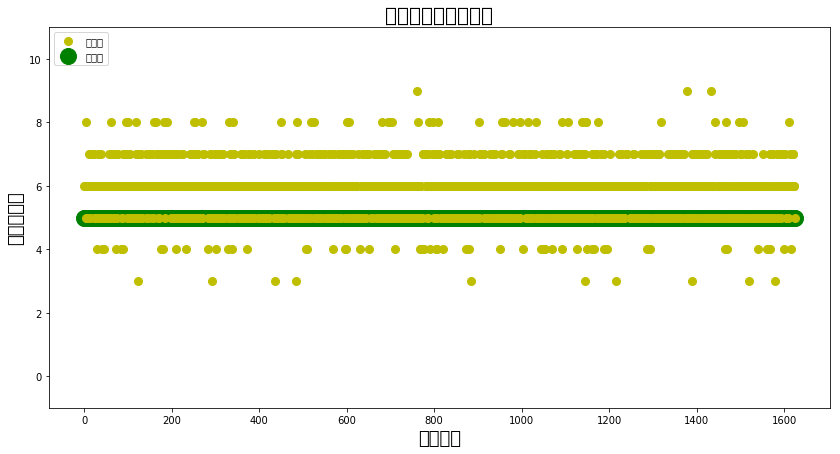

In [81]:
x_len = range(len(X_test))
plt.figure(figsize=(14,7),facecolor='w')
#y轴数值范围
plt.ylim(-1,11)
#打印真实值&预测值
plt.plot(x_len,Y_test,'yo',markersize=8,zorder=3,label=u'真实值')
plt.plot(x_len,Y_predict,'go',markersize=16,zorder=2,label=u'预测值')
plt.legend(loc='upper left')
plt.xlabel(u'实例编号',fontsize=18)
plt.ylabel(u'葡萄酒质量',fontsize=18)
plt.title(u'葡萄酒质量预测统计',fontsize=20)
plt.show()
